In [136]:
import numpy as np
import matplotlib.pyplot as plt

In [137]:
half_bandwidth = 1  # エネルギーバンド幅
small_imaginary_part = 0.1  # エネルギーの小さな虚部
energy_samples = 1000  # エネルギーサンプルの数
U = 10.0

def density_of_states(half_bandwidth, energy):
    return 2 / (np.pi * half_bandwidth) * np.sqrt(1 - (energy / half_bandwidth) ** 2)

def green_function(energies, half_bandwidth, small_imaginary_part):
    energy_prime = np.linspace(-half_bandwidth, half_bandwidth, energy_samples)
    energy_prime_mesh = energy_prime.reshape(-1, 1)
    energies_mesh = np.asarray(energies).reshape(1, -1)
    
    integrand = density_of_states(half_bandwidth, energy_prime_mesh) / (energies_mesh - energy_prime_mesh + 1j * small_imaginary_part)
    return np.trapz(integrand, energy_prime, axis=0)

# 例: 単一のエネルギーおよびエネルギー配列でグリーン関数を計算する
energy_array = np.linspace(-10, 10, 1000)
Gs = green_function(energy_array, half_bandwidth, small_imaginary_part)

rho = -Gs.imag / np.pi
def f(x):
    return np.where(x < 0, 1, 0)

def alpha(t):
    t_t = np.asarray(t).reshape(-1, 1)
    energies = np.linspace(-10, 10, 10000)
    rho = -green_function(energies, half_bandwidth, small_imaginary_part).imag / np.pi
    fs = f(energies)
    integrand = rho*fs*np.exp(-1j*energies*t_t)
    return np.trapz(integrand, energies)

def beta(t):
    t_t = np.asarray(t).reshape(-1, 1)
    energies = np.linspace(-10, 10, 10000)
    rho = -green_function(energies, half_bandwidth, small_imaginary_part).imag / np.pi
    fs = f(-energies)
    integrand = rho*fs*np.exp(-1j*energies*t_t)
    return np.trapz(integrand, energies)

def sigma(epsilon, U):
    epsilon_t = np.asarray(epsilon).reshape(1, -1)
    ts = np.linspace(0, 100, 10000).reshape(-1,1)
    alpha_ts = alpha(ts).reshape(-1,1)
    beta_ts = beta(ts).reshape(-1,1)
    print(epsilon_t.shape)
    print(ts.shape)
    integrand = (beta_ts*beta_ts*alpha_ts + alpha_ts*alpha_ts*beta_ts)\
    *np.exp(-1j*(epsilon_t + small_imaginary_part*1j)*ts)
    print(integrand.shape)
    return -1.0j*U**2*np.trapz(integrand, ts, axis=0)

In [138]:
sigma = sigma(energy_array, U)

(1, 1000)
(10000, 1)
(10000, 1000)


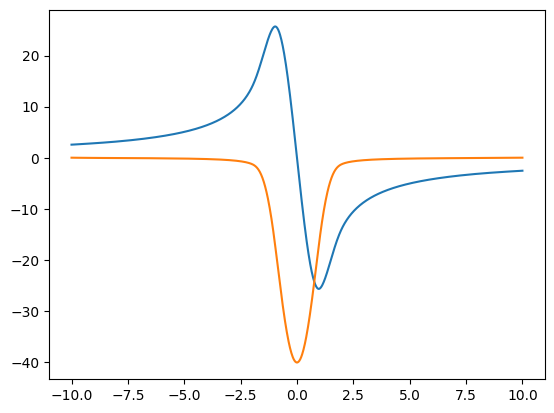

In [139]:
fig,ax=plt.subplots()
ax.plot(energy_array, sigma.real, label='real')
ax.plot(energy_array, sigma.imag, label='imag')

In [140]:
Gs_new = 1.0/(1.0/Gs - sigma)

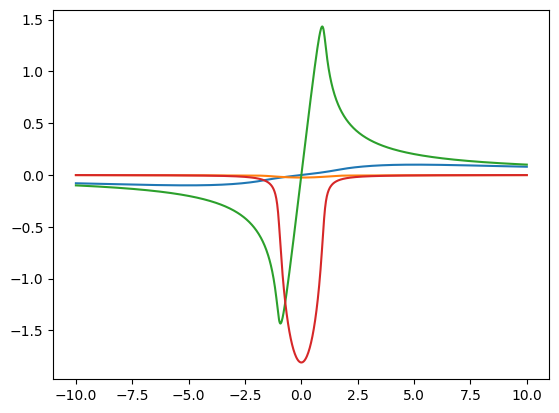

In [141]:
fig,ax=plt.subplots()
ax.plot(energy_array, Gs_new.real, label='real')
ax.plot(energy_array, Gs_new.imag, label='imag')
ax.plot(energy_array, Gs.real, label='real')
ax.plot(energy_array, Gs.imag, label='imag')